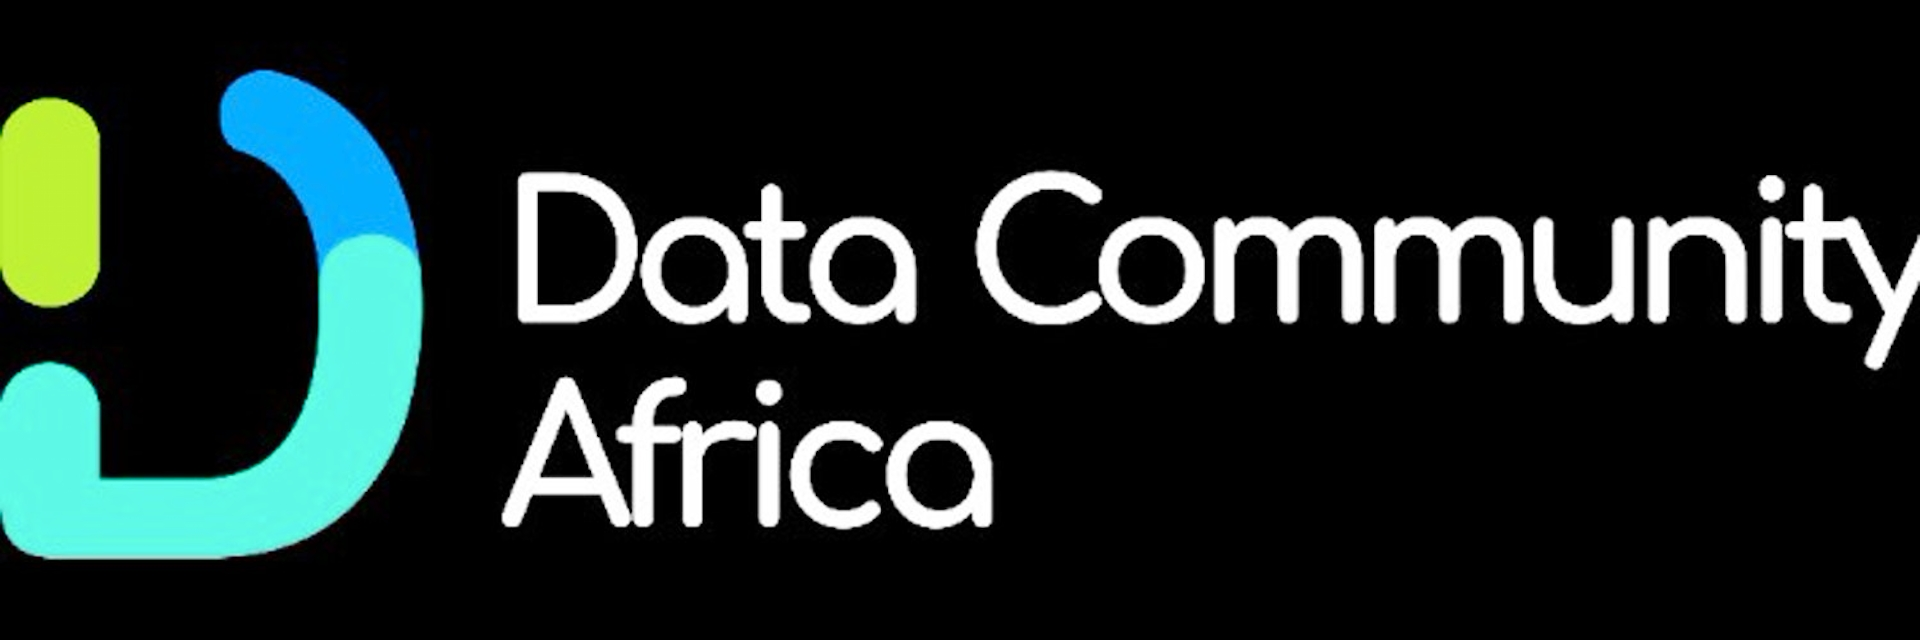

# DFA Datathon 2023 (Insight Drivers)

***FRAUD DETECTION FOR ONLINE PAYMENT PLATFORM***

Project Understanding : Overview

Our online payment platform processes millions of transactions daily, making it vulnerable to various types of fraudulent activities. These activities pose a significant threat to both our business and our customers. To safeguard our platform and enhance user experience, we aim to leverage the power of data science and machine learning to proactively detect and prevent fraudulent transactions

***Project goals***

- Fraud Detection Model: You are required to build an advanced machine learning model to predict whether a given transaction is potentially fraudulent or not. This model will be vital for real-time decision-making, allowing us to flag and investigate suspicious activities promptly

- Enhanced Security: The primary aim is to enhance the security of our platform. By identifying fraudulent transactions early, we can take preventive measures to protect our customers and our business from financial losses
- User Trust: Fraud detection directly impacts the trust our customers have in our platform. Accurate and efficient detection of fraudulent activities assures our users that their transactions are safe and secure

- Operational Efficiency: Implementing automated fraud detection reduces the manual effort required for monitoring transactions, allowing our business to operate more efficiently








# *ABOUT THE DATASET*

The dataset contains 6,000,000 records and 32 fields, each entry describing whether a transaction is fraudulent or not . The dataset spans across 3 years (2021-2023) and is divided into 3 segments according to definition of columns ; the transaction-related segment, the user-related segment and the Fraud-related segment.

The following columns (fields) are present in the dataset in no particular order alongside their datatypes;

- Transaction ID - A unique identifier for every transaction (int)
- User ID - A unique identifier for every user (int)
- Transaction amount - The amount involved in the transaction (float)
- Transaction Date and Time - The date and time when the transaction occured (object)
- Merchant ID - A unique Identifier for merchants (int)
- Payment Method - Method of payment for the transaction (object)
- Country code - A unique code for the country where the transaction occurred (object)
- Transaction type - The type of transaction (object)
- Device Type - Type of device used for the transaction (object)
- IP Address -The Internet protocol address linked to the transaction (object)
- Browser Type - The type of browser used to carry out the transaction (object)
- Operating system - The operating system used for the transaction (object)
- Merchant Category - Category for merchants (object)
- User Age - Age of user transacting (int)
- User Occupation - The occupation of the user transacting (object)
- User Income - The Income of the user transacting (float)
- User Gender - The gender of the user transacting (object)
- User Account Status - The account status of the user transacting (object)
- Transaction status - The status of the transaction (object)
- Location Distance - The distance of the transaction location (float)
- Time taken for transaction - The time taken for the completion of transaction(float)
- Transaction time of the day - The time of the day when the transaction occurred (object)
- User Trnsaction history - Transaction history of users (int)
- Merchant reputation score - reputation score for merchants (float)
- User's Device location - The location of the device used for the transaction (object)
- Transaction Currency - The currency the transaction was performed in (object)
- Transaction purpose - Reason for the transaction (object)
- User's credit score - The credit score of the users (int)
- User's email domian - The email domain of the users (object)
- Merchant Business Age - The Age of the merchant's business (* confirm descr)
- Transaction Authentication Method - Authentication mmethod of the transaction
- Fraudulent flag - implying whether a transaction is fraudulent or not . 1 for fraudulent transactions and 0 for not fraudulent transactions (int)

*DATA COLLECTION*

The data was shared with the google drive platform and was transferred into the tool used (google colaboratory)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Fraud detection.csv'

In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(path)
data.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


DATA EXPLORATION

In [ ]:
data.shape

(6000000, 32)

In [ ]:
data.duplicated().sum()

0

*No duplicate values found*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

*Some fields do not have the correct data types, let's fix that!*

In [ ]:
import datetime

In [ ]:
data['Transaction Date and Time'] = pd.to_datetime(data['Transaction Date and Time'])

In [ ]:
data['Fraudulent Flag'] = data['Fraudulent Flag'].astype(bool)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Transaction ID                     int64         
 1   User ID                            int64         
 2   Transaction Amount                 float64       
 3   Transaction Date and Time          datetime64[ns]
 4   Merchant ID                        int64         
 5   Payment Method                     object        
 6   Country Code                       object        
 7   Transaction Type                   object        
 8   Device Type                        object        
 9   IP Address                         object        
 10  Browser Type                       object        
 11  Operating System                   object        
 12  Merchant Category                  object        
 13  User Age                           int64         
 14  Us

*Data is looking good, we may proceed!*


In [ ]:
# Let's extract the year,month and days from out datetime column to add more meaning to our analysis

data['Year'] = data['Transaction Date and Time'].dt.year
data['Month'] = data['Transaction Date and Time'].dt.month
data['Day'] = data['Transaction Date and Time'].dt.day
data['Hour'] = data['Transaction Date and Time'].dt.hour

In [ ]:
data['Year'].unique()

array([2023, 2021, 2022])

*QUICK SUMMARY STATISTICS*

In [ ]:
data.describe()

,Transaction ID,User ID,Transaction Amount,Merchant ID,User Age,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Year,Month,Day,Hour
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.501906e+07,5.499571e+03,5.005515e+02,5.500817e+03,4.900159e+01,5.049328e+04,5.050600e+01,3.049492e+01,5.048393e+01,2.999382e+00,5.749533e+02,1.049685e+01,2.021836e+03,5.959511e+00,1.569411e+01,1.149904e+01
std,2.598067e+07,2.598744e+03,2.884166e+02,2.598350e+03,1.818538e+01,2.858223e+04,2.857562e+01,1.703567e+01,2.886705e+01,1.154479e+00,1.590197e+02,5.764884e+00,7.649476e-01,3.349419e+00,8.776929e+00,6.923466e+00
min,1.000004e+07,1.000000e+03,1.000000e+00,1.000000e+03,1.800000e+01,1.000020e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+02,1.000000e+00,2.021000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.251666e+07,3.248000e+03,2.507900e+02,3.251000e+03,3.300000e+01,2.573446e+04,2.576000e+01,1.574000e+01,2.500000e+01,2.000000e+00,4.370000e+02,5.000000e+00,2.021000e+03,3.000000e+00,8.000000e+00,5.000000e+00
50%,5.502987e+07,5.499000e+03,5.005100e+02,5.501000e+03,4.900000e+01,5.050294e+04,5.051000e+01,3.050000e+01,5.000000e+01,3.000000e+00,5.750000e+02,1.000000e+01,2.022000e+03,6.000000e+00,1.600000e+01,1.200000e+01
75%,7.752487e+07,7.751000e+03,7.504400e+02,7.752000e+03,6.500000e+01,7.523454e+04,7.525000e+01,4.526000e+01,7.500000e+01,4.000000e+00,7.130000e+02,1.500000e+01,2.022000e+03,9.000000e+00,2.300000e+01,1.800000e+01
max,9.999988e+07,9.999000e+03,1.000000e+03,9.999000e+03,8.000000e+01,1.000000e+05,1.000000e+02,6.000000e+01,1.000000e+02,5.000000e+00,8.500000e+02,2.000000e+01,2.023000e+03,1.200000e+01,3.100000e+01,2.300000e+01


*Outliers can be a big issue to our model if they're not properly looked out for. We want the best possible accuracy,therefore,let's fish out some outliers if there's any*

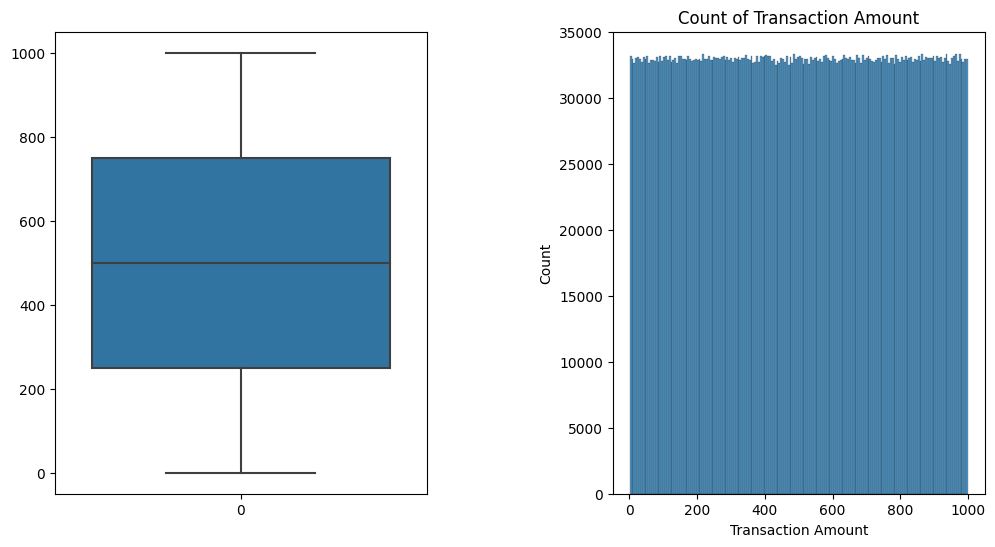

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(data['Transaction Amount'])
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)


plt.subplot(1,2,2)
sns.histplot(data['Transaction Amount'])
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
plt.title('Count of Transaction Amount')

plt.show()

No outlier(s) found in Transaction amount

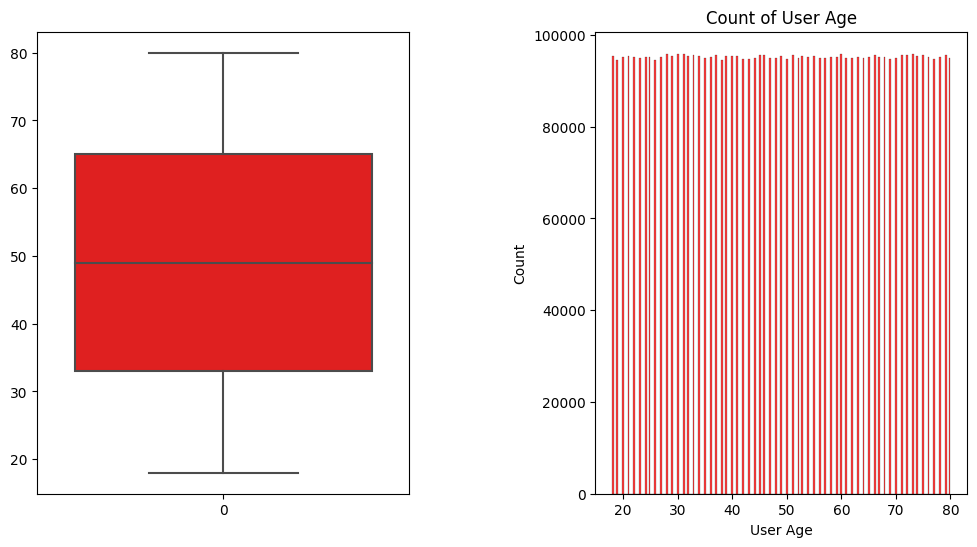

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(data['User Age'],color = 'red')
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)


plt.subplot(1,2,2)
sns.histplot(data['User Age'],color = 'red')
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
plt.title('Count of User Age')

plt.show()

No outlier(s) found in User Age

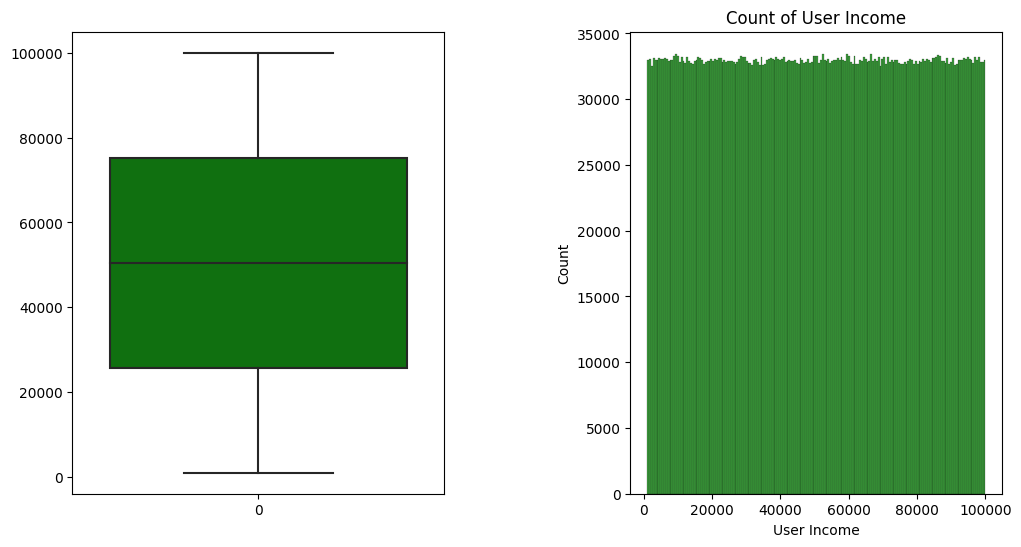

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(data['User Income'],color = 'green')
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)


plt.subplot(1,2,2)
sns.histplot(data['User Income'],color = 'green')
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
plt.title('Count of User Income')

plt.show()

No outlier(s) found in User Income

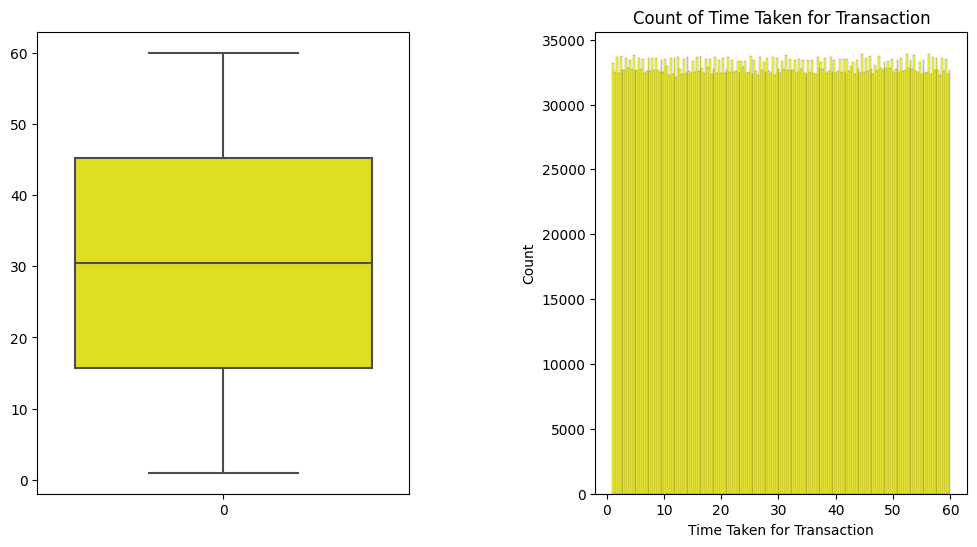

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(data['Time Taken for Transaction'],color = 'yellow')
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)


plt.subplot(1,2,2)
sns.histplot(data['Time Taken for Transaction'],color = 'yellow')
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
plt.title('Count of Time Taken for Transaction')

plt.show()

No outlier(s) found in Time taken for transaction

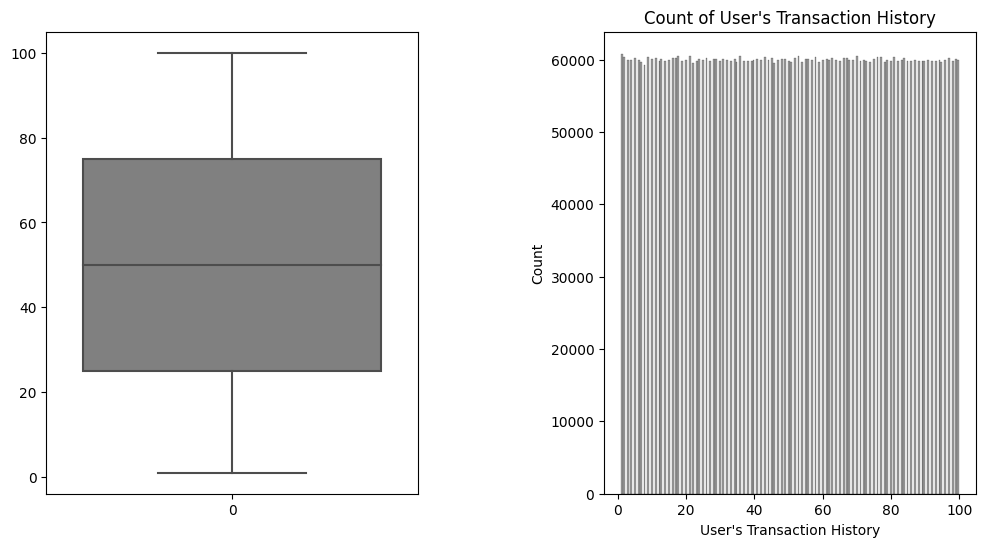

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(data['User\'s Transaction History'],color = 'grey')
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)


plt.subplot(1,2,2)
sns.histplot(data['User\'s Transaction History'],color = 'grey')
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
plt.title('Count of User\'s Transaction History')

plt.show()

No outlier(s) found in User's Transaction History

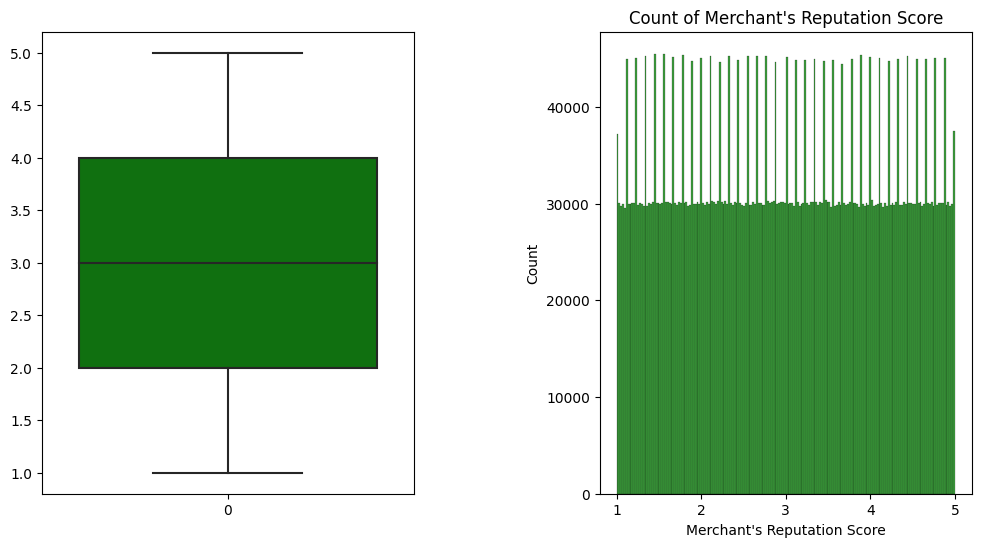

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(data['Merchant\'s Reputation Score'],color = 'green')
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)


plt.subplot(1,2,2)
sns.histplot(data['Merchant\'s Reputation Score'],color = 'green')
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
plt.title('Count of Merchant\'s Reputation Score')

plt.show()

No outlier(s) found in Merchant's Reputation Score

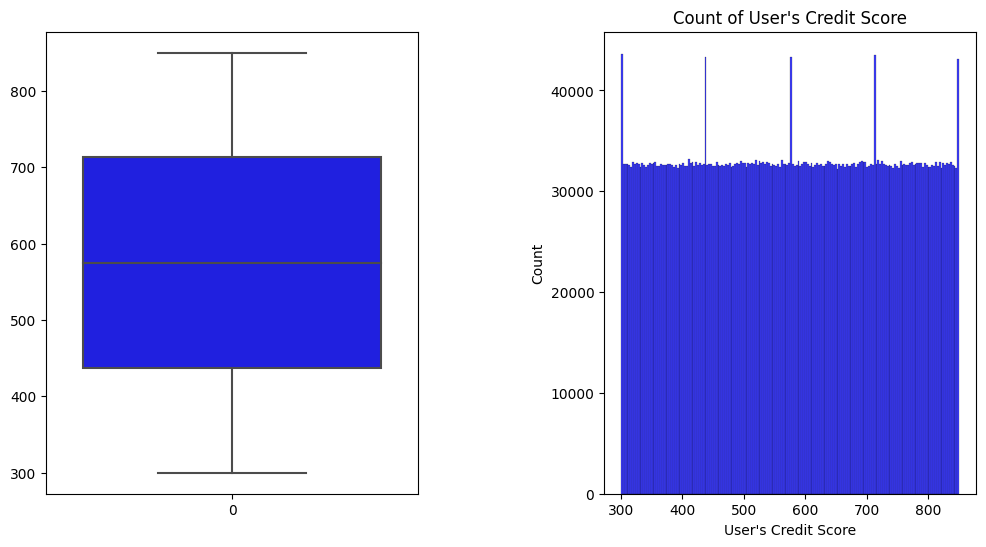

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(data['User\'s Credit Score'],color = 'blue')
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)


plt.subplot(1,2,2)
sns.histplot(data['User\'s Credit Score'],color = 'blue')
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
plt.title('Count of User\'s Credit Score')

plt.show()

No outlier(s) found in User's Credit Score

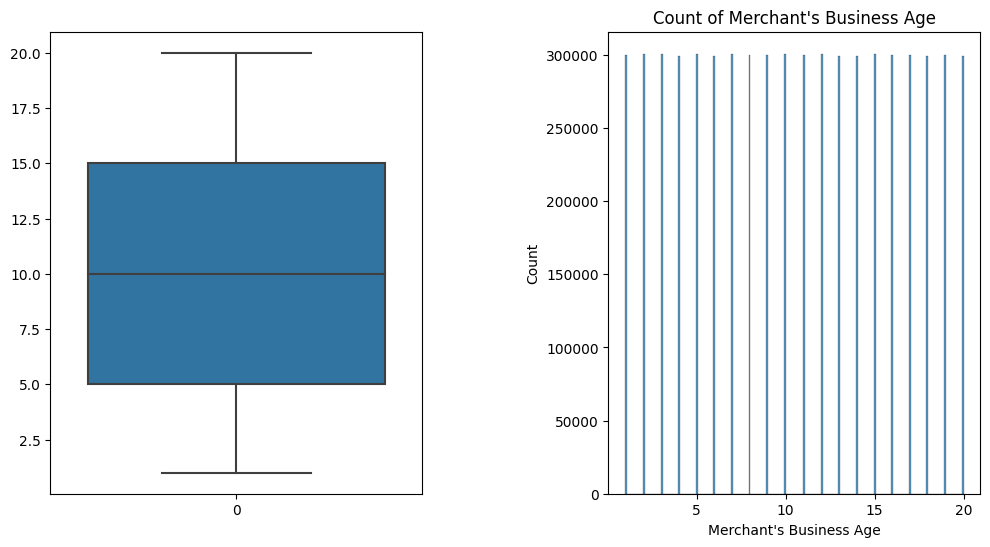

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(data['Merchant\'s Business Age'])
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)


plt.subplot(1,2,2)
sns.histplot(data['Merchant\'s Business Age'])
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
plt.title('Count of Merchant\'s Business Age')

plt.show()

No outlier(s) found in Merchant's Business Age

# **EXPLORATORY DATA ANALYSIS**

- # *Count of users by gender*

In [ ]:
gender_counts = data['User Gender'].value_counts()

gender_c_table = pd.DataFrame({'Gender':gender_counts.index,'Count':gender_counts.values})
gender_c_table

,Gender,Count
0,Male,858298
1,Non-Binary,858060
2,Prefer Not to Say,857184
3,Female,856905
4,Genderqueer,856848
5,Other,856554
6,Agender,856151


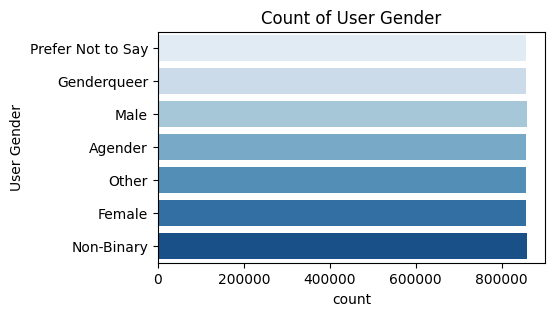

In [ ]:
plt.figure(figsize = (5,3))

sns.countplot(data = data , y = 'User Gender',palette = 'Blues')
plt.title('Count of User Gender')
plt.show()

- The count of users by gender has very close values ,hence, there's no much difference in the plot

- #  *What is the average age of Users ?*

In [ ]:
user_avg_age = data['User Age'].mean()
user_avg_age

49.00159416666666

*The average age of users is 40 years*

- #  *What are the top 5 occupation of Users ?*

In [ ]:
User_occ_count = data['User Occupation'].value_counts()

User_occ_table = pd.DataFrame({'User Occupation':User_occ_count.index,'Count':User_occ_count.values})
sort1 = User_occ_table.sort_values(by = 'Count', ascending = False)
top5 = sort1.head()
top5

,User Occupation,Count
0,Salesperson,231511
1,Engineer,231457
2,Lawyer,231353
3,Police Officer,231344
4,Plumber,231340


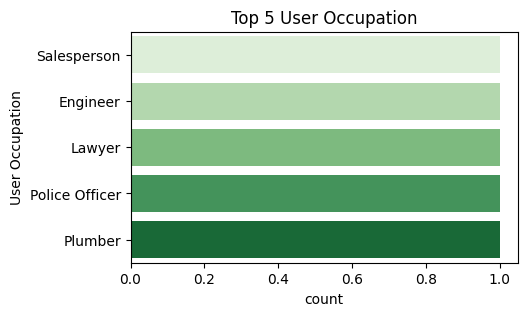

In [ ]:
plt.figure(figsize = (5,3))

sns.countplot(data = top5 , y = 'User Occupation',palette = 'Greens')
plt.title('Top 5 User Occupation')
plt.show()



- *The most common Occupation is Salesperson*

- #  *What are the most common email domain used ?*

In [ ]:
email_dom_count = data['User\'s Email Domain'].value_counts()

User_ed_table = pd.DataFrame({'User Email domain':email_dom_count.index,'Count':email_dom_count.values})
sort2 = User_ed_table.sort_values(by = 'Count', ascending = False)
top5_ed = sort2.head()
top5_ed

,User Email domain,Count
0,roadrunner.co.uk,150776
1,gmail.co.in,150688
2,yandex.co.uk,150536
3,outlook.com,150529
4,zoho.co.uk,150482


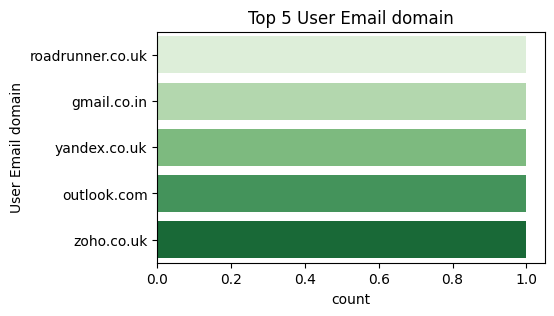

In [ ]:
plt.figure(figsize = (5,3))

sns.countplot(data = top5_ed , y = 'User Email domain',palette = 'Greens')
plt.title('Top 5 User Email domain')
plt.show()

- *The most common email domain is roadrunner.co.uk*

- #  *What is the average transaction amount?*

In [ ]:
avg_amount = data['Transaction Amount'].mean()
avg_amount

500.5515424283335

- *The average transaction amount is 500*

- # *What are the top 5 Transaction currencies?*

In [ ]:
tran_curr_count = data['Transaction Currency'].value_counts()

tran_curr_table = pd.DataFrame({'Transaction Currency ':tran_curr_count.index,'Count':tran_curr_count.values})
sort3 = tran_curr_table.sort_values(by = 'Count', ascending = False)
top5_tc = sort3.head()
top5_tc

,Transaction Currency,Count
0,ZAR,150722
1,MXN,150710
2,SEK,150660
3,MYR,150622
4,CLP,150574


- # CORRELATIONAL ANALYSIS

In [ ]:
# Is there any correlation between Time taken for transaction and Fraudulent flag?

corr1 = data['Time Taken for Transaction'].corr(data['Fraudulent Flag'])
corr1

-0.00026161547948015283

- *Time taken for a transaction has little or no correlation with a fraudulent transaction*

In [ ]:
# Is there any correlation between Location Distance and Fraudulent flag?
corr2 = data['Location Distance'].corr(data['Fraudulent Flag'])
corr2

0.000276605507414345

- *Location Distance  little or no correlation with a fraudulent transaction*

In [ ]:
# Is there any correlation between a User's credit score  and Fraudulent flag?
corr3 = data['User\'s Credit Score'].corr(data['Fraudulent Flag'])
corr3

-0.00021578126646516725

- *User's credit score  has little or no correlation with a fraudulent transaction*

In [ ]:
# Is there any correlation between a merchant's credit score  and Fraudulent flag?
corr4 = data['Merchant\'s Reputation Score'].corr(data['Fraudulent Flag'])
corr4

0.0003218426732168531

- *Merchant's reputation score has little or no correlation with a fraudulent transaction*

- #  *How is the the fraudulent flag variable distributed ?*

In [ ]:
fraud_counts = data['Fraudulent Flag'].value_counts()

fraud_c_table = pd.DataFrame({'Fraud count ':fraud_counts.index,'Count':fraud_counts.values})
fraud_c_table

,Fraud count,Count
0,False,3000094
1,True,2999906


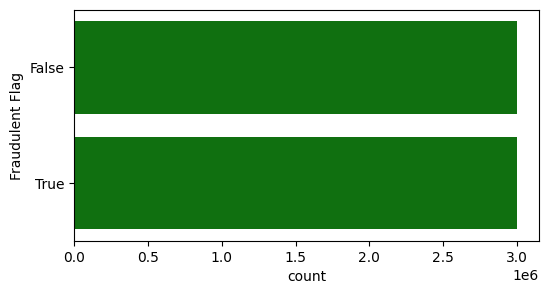

In [ ]:
plt.figure(figsize = (6,3))

sns.countplot(data = data , y = 'Fraudulent Flag',color = 'green')
plt.show()

*Now, Let's see how number of transactions vary over time . Are there any patterns to uncover? Let's find out!*

*TREND ANALYSIS*

In [ ]:
# Transaction count by year

transaction_count_yearly = data.groupby('Year')['Transaction ID'].count().reset_index()
transaction_count_yearly


,Year,Transaction ID
0,2021,2328384
1,2022,2327626
2,2023,1343990


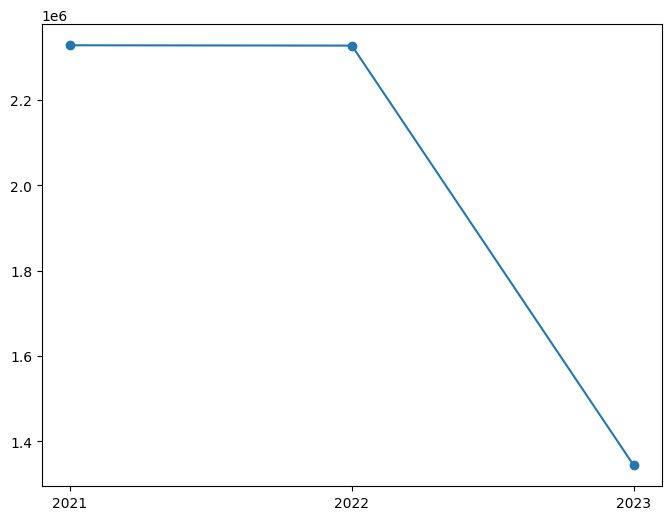

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(transaction_count_yearly ['Year'],transaction_count_yearly ['Transaction ID'],linestyle = '-', marker = 'o')
plt.locator_params(axis='x', integer=True)

plt.show()



High transaction activity was recorded in 2021, and maintained till 2022 but transactions is seen to have  declined between 2022 and 2023

In [ ]:
transaction_count_monthly = data.groupby(by = 'Month')['Transaction ID'].count().reset_index()
transaction_count_monthly

,Month,Transaction ID
0,1,592477
1,2,534919
2,3,593432
3,4,575500
4,5,594618
5,6,573906
6,7,585448
7,8,395086
8,9,382488
9,10,393710


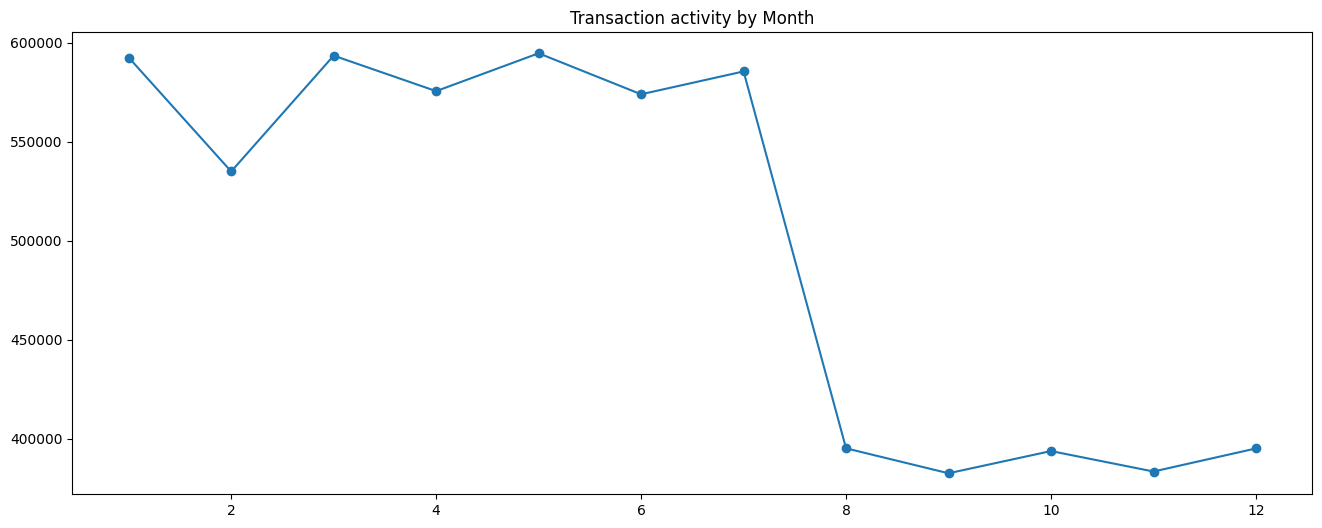

In [ ]:
plt.figure(figsize = (16,6))
plt.plot(transaction_count_monthly['Month'],transaction_count_monthly ['Transaction ID'],linestyle = '-', marker = 'o')
plt.title('Transaction activity by Month')
plt.show()

There was a massive decline in Transaction from month 8 to 12 (August to
December)

In [ ]:
transaction_count_hourly = data.groupby('Hour')['Transaction ID'].count().reset_index()
transaction_count_hourly

,Hour,Transaction ID
0,0,250640
1,1,249555
2,2,249791
3,3,251048
4,4,249950
5,5,249649
6,6,250190
7,7,250490
8,8,249764
9,9,249526


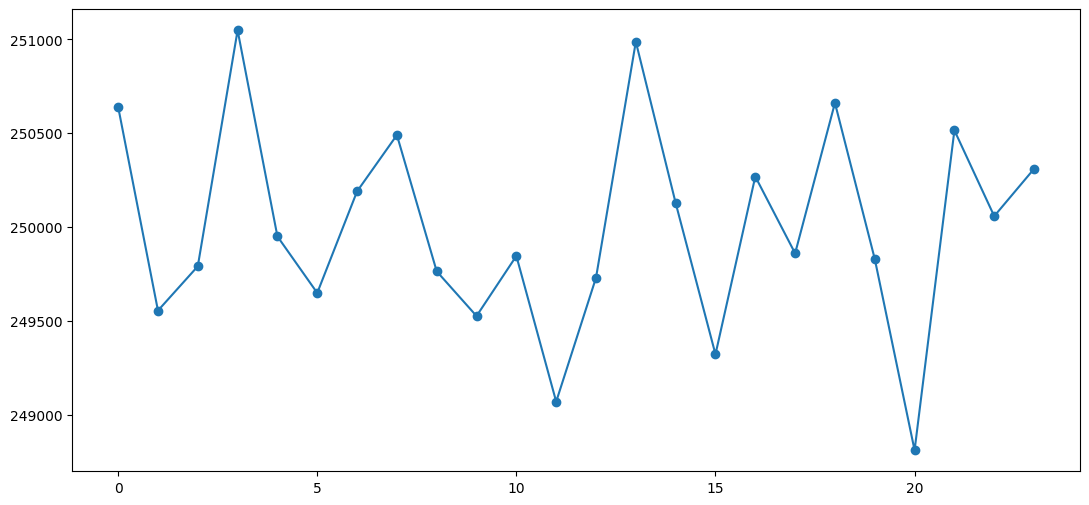

In [ ]:
plt.figure(figsize = (13,6))
plt.plot(transaction_count_hourly ['Hour'],transaction_count_hourly ['Transaction ID'],linestyle = '-', marker = 'o')
plt.show()

- *Transaction rate is high towards afternoon*